In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import public modules
import matplotlib
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Import custom modules
from applications.molecules.src import utils
from applications.molecules.src import cheminf
from applications.molecules.src import plotting

# Use latex-like font for figures
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family']      = 'STIXGeneral'

# Generate the figures directory if it does not exist yet
figures_dir_path = '../figures/'
utils.create_folder_if_inexistent(figures_dir_path)

[17:11:26] Initializing Normalizer


In [3]:
######################################################################################################
### Load the generated molecules for different target properties as different DataFrames
######################################################################################################
# Define the generated directory
generated_dir = '../generated/article'

# Define the name of the samples table files
samples_table_name = 'samples_table.tsv'

# Define a dictionary with all the different directory paths 
# relative to the generation directory
rel_dir_path_dict = {
    ### Number of rings
    ## Number of rings (unconditional)
    'num_rings=None':           'num_rings=None|n=1000',

    ## Number of rings (guided)
    'num_rings=1_T=05_exact':   'num_rings=1|n=1000',
    'num_rings=1_T=05_TAG':     'num_rings=1|n=1000|sampler.grad_approx=True',
    'num_rings=1_T=05_DiGress': 'num_rings=1|n=1000|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    'num_rings=5_T=05_exact':   'num_rings=5|n=1000',
    'num_rings=5_T=05_TAG':     'num_rings=5|n=1000|sampler.grad_approx=True',
    'num_rings=5_T=05_DiGress': 'num_rings=5|n=1000|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',


    ### LogP
    ## LogP (unconditional)
    'logp=None':                'logp=None|n=1000',

    ## LogP (guided)
    'logp=-2_T=05_exact':       'logp=-2|n=1000',
    'logp=-2_T=05_TAG':         'logp=-2|n=1000|sampler.grad_approx=True',
    'logp=-2_T=05_DiGress':     'logp=-2|n=1000|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',
    
    'logp=10_T=05_exact':       'logp=10|n=1000',
    'logp=10_T=05_TAG':         'logp=10|n=1000|sampler.grad_approx=True',
    'logp=10_T=05_DiGress':     'logp=10|n=1000|sampler.grad_approx=True|trained_run_folder_dir=./trained/DTDM',

    
}

# Load all the dataframes containing the sampled/generated tables
gen_df_dict = dict()
for key, rel_dir_path in rel_dir_path_dict.items():
    file_path = str(Path(generated_dir, rel_dir_path, samples_table_name))
    gen_df_dict[key] = pd.read_csv(file_path, sep='\t')


target_num_rings=nan
Number of smiles (after filter): 997
#unique_valid-smiles:            997
#unique-valid_molecules:         997
#uniqueness-fraction:            1.000
----------------------------------------------------------------------------------------------------
target_num_rings=1
Number of smiles (after filter): 989
#unique_valid-smiles:            989
#unique-valid_molecules:         989
#uniqueness-fraction:            1.000
----------------------------------------------------------------------------------------------------
target_num_rings=nan
Number of smiles (after filter): 997
#unique_valid-smiles:            997
#unique-valid_molecules:         997
#uniqueness-fraction:            1.000
----------------------------------------------------------------------------------------------------
target_num_rings=5
Number of smiles (after filter): 941
#unique_valid-smiles:            941
#unique-valid_molecules:         941
#uniqueness-fraction:            1.000
-----------------

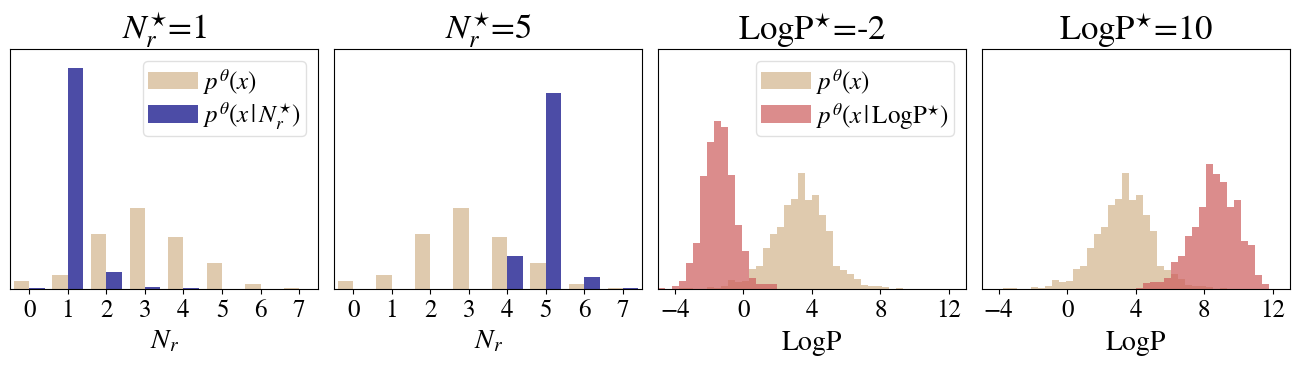

----------------------------------------------------------------------------------------------------
target_num_rings=1
Number of smiles (after filter): 989
#unique_valid-smiles:            989
#unique-valid_molecules:         989
#uniqueness-fraction:            1.000
----------------------------------------------------------------------------------------------------


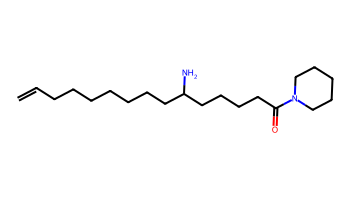

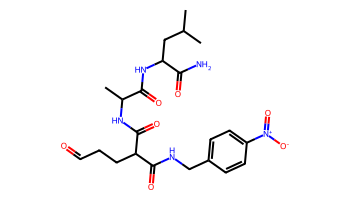

----------------------------------------------------------------------------------------------------
target_num_rings=5
Number of smiles (after filter): 941
#unique_valid-smiles:            941
#unique-valid_molecules:         941
#uniqueness-fraction:            1.000
----------------------------------------------------------------------------------------------------


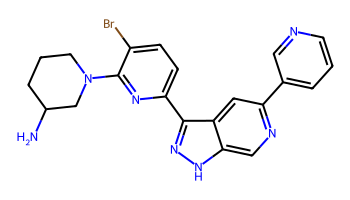

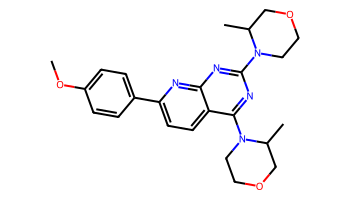

----------------------------------------------------------------------------------------------------
target_logp=-2
Number of smiles (after filter): 816
#unique_valid-smiles:            816
#unique-valid_molecules:         814
#uniqueness-fraction:            0.998
----------------------------------------------------------------------------------------------------


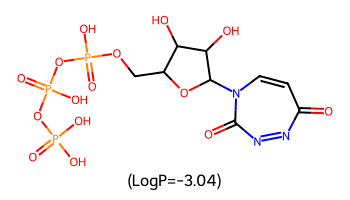

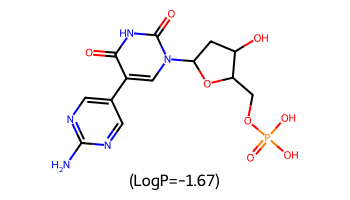

----------------------------------------------------------------------------------------------------
target_logp=10
Number of smiles (after filter): 827
#unique_valid-smiles:            827
#unique-valid_molecules:         826
#uniqueness-fraction:            0.999
----------------------------------------------------------------------------------------------------


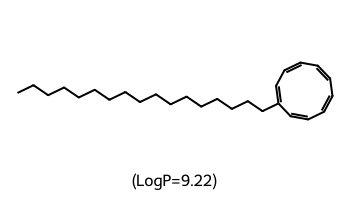

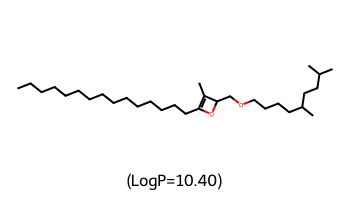

In [4]:
######################################################################################################
### Create parts of the figure related to molecule-generation results shown in the main text
######################################################################################################
# Define the plot specs
color_uc              = 'tan'       # Unconditional
color_cn              = 'navy'      # Guided-conditional (approximative) for Number of rings predictor
color_cp              = 'indianred' # Guided-conditional (approximative) for LogP predictor
color_d               = 'teal'      # Data
label_uc              = r'$p^{\theta}(x)$'                          # Unconditional
label_cn              = r'$p^{\theta}(x\,|\,N_{r}^{\star})$'         # Guided-conditional (approximative) for  Number of rings predictor
label_cp              = r'$p^{\theta}(x\,|\,\mathrm{LogP}^{\star})$' # Guided-conditional (approximative) for LogP predictor
x_label_num_rings     = r'$N_{r}$' #'r'$N_{\mathrm{rings}}$'
x_label_logp          = r'$\mathrm{LogP}$'
alpha                 = 0.7
bin_centers_num_rings = np.linspace(0, 7, 8)
x_ticks_logp          = [-4, 0, 4, 8, 12]
y_max_scale_logp      = 3.5
bin_edges_logp        = np.linspace(-5, 13, 45)
panel_label_rel_xy    = [0.01, 0.97]
num_rings_list        = ['num_rings=1', 'num_rings=5'] #'num_rings=3' 'num_rings=4'
logp_list             = ['logp=-2', 'logp=10'] #, 'logp=6', 'logp=10', 'logp=8']
key_suffix            = 'T=05_exact' # Show results for 'exact' sampling at a guidance temperature of T=0.5
panel_labels          = ['', '', '', '']
fs_dict               = {
                        'axis':  20,
                        'ticks': 18,
                        'leg':   18,
                        'title': 25,
                        'text':  18,
}


# Set the number of valid samples (i.e. generated molecules) to use for plots
num_valid_samples_num_rings = 1000
num_valid_samples_logp      = 1000


# Make the figure and with panels
fig, axs = plt.subplots(1, 4, figsize=(16, 3)) # 3

### Row 1, col 1/2: Number of rings
panel_counter = 0
for index, key in enumerate(num_rings_list):
    # Update the key by adding the specified suffix
    key = f"{key}_{key_suffix}"

    # Get the current axis (row index 0)
    ax = axs[index]

    # Only show legend for first plot
    if index==0:
        show_legend=True
    else:
        show_legend=False

    # Get the panel label
    panel_label    = panel_labels[panel_counter]
    panel_counter += 1

    # Get the current target class
    target_num_rings = int(list(set(gen_df_dict[key]['target_num_rings']))[0])

    # Set a title
    title_label = r'$N_{r}^{\star}$='+str(target_num_rings)
    ax.set_title(title_label, fontsize=fs_dict['title'])

    # Get the property (here num-rings) distribution for the valid molecules
    distr_l = utils.get_property_distr(gen_df_dict['num_rings=None'], 'ground_truth', property_name='num_rings', num_valid_samples=num_valid_samples_num_rings)
    distr_r = utils.get_property_distr(gen_df_dict[key], 'ground_truth', property_name='num_rings', num_valid_samples=num_valid_samples_num_rings)

    # Make the plot
    plotting.plot_num_rings_distr(distr_l,
                                  distr_r, 
                                  bin_centers=bin_centers_num_rings,
                                  color_l=color_uc,
                                  color_r=color_cn,
                                  label_l=label_uc,
                                  label_r=label_cn,
                                  x_label=x_label_num_rings,
                                  show_y_ticks=False,
                                  show_legend=show_legend,
                                  fs_dict=fs_dict,
                                  panel_label=panel_label,
                                  panel_label_rel_xy=panel_label_rel_xy,
                                  ax=ax,
                                  leg_loc='upper right',
                                  leg_handletextpad=0.2,
                                  leg_borderpad=0.2,
                                  leg_vertical_labelspacing=0.15,
                                  leg_framealpha=0.6,
                                  alpha=alpha)
    
### Row 1, col 3/4: LogP
y_max_logp = 0
panel_label_handles = list()
for index, key in enumerate(logp_list):
    # Update the key by adding the specified suffix
    key = f"{key}_{key_suffix}"

    # Only show legend for first plot
    if index==0:
        show_legend=True
    else:
        show_legend=False
        
    # Get the current axis (row index 1)
    ax = axs[index+2]

    # Get the panel label
    panel_label    = panel_labels[panel_counter]
    panel_counter += 1

    # Get the target class
    target_logp = int(list(set(gen_df_dict[key]['target_logp']))[0])
    title_label = r'$\mathrm{LogP}^{\star}$='+str(target_logp)
    ax.set_title(title_label, fontsize=fs_dict['title'])

    # Get the property (here num-rings) distribution for the valid molecules
    distr_l = utils.get_property_distr(gen_df_dict['logp=None'], 'ground_truth', property_name='logp', num_valid_samples=num_valid_samples_logp)
    distr_r = utils.get_property_distr(gen_df_dict[key], 'ground_truth', property_name='logp', num_valid_samples=num_valid_samples_logp)

    # Make the plot
    y_max_logp_local, panel_label_handle = plotting.plot_logp_distr(distr_l,
                                                                    distr_r,
                                                                    bin_edges=bin_edges_logp,
                                                                    color_l=color_uc,
                                                                    color_r=color_cp,
                                                                    label_l=label_uc,
                                                                    label_r=label_cp,
                                                                    x_label=x_label_logp,
                                                                    x_ticks=x_ticks_logp,
                                                                    show_y_ticks=False,
                                                                    show_legend=show_legend,
                                                                    fs_dict=fs_dict,
                                                                    panel_label=panel_label,
                                                                    panel_label_rel_xy=panel_label_rel_xy,
                                                                    ax=ax,
                                                                    leg_loc='upper right',
                                                                    leg_handletextpad=0.2,
                                                                    leg_borderpad=0.2,
                                                                    leg_vertical_labelspacing=0.15,
                                                                    alpha=alpha,
                                                                    leg_framealpha=0.6,
                                                                    histtype='stepfilled')
    
    # Update y_max of logp-plots
    y_max_logp = max([y_max_logp, y_max_logp_local])

    # Append the panel label handle to corresponding list
    panel_label_handles.append(panel_label_handle)

# Determine y_max of the logp plots by scaling it
y_lim_logp = [0, y_max_logp*y_max_scale_logp]

# Set the y-limits for all log-p plots
for index in range(len(logp_list)):
    axs[index+2].set_ylim(y_lim_logp)
    panel_label_y = y_lim_logp[0]+(y_lim_logp[1]-y_lim_logp[0])*panel_label_rel_xy[1]
    panel_label_handles[index].set_y(panel_label_y)

### Global specs
# Adjust subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.6)

plt.show()

# Save the figure as pdf
file_path = str(Path(figures_dir_path, 'main_property_histograms.pdf'))
fig.savefig(file_path, format='pdf', bbox_inches='tight')


####################################################################################################
### Display some of the first molecules generated for each specified target num_rings value
####################################################################################################
# Specify how many molecules to show
show_first = 2

# (a) Show first molecules for specified target num_rings
property_name  = None # Do not display any property
property_label = None # As we are not displaying any property we do not have to label any
for key in num_rings_list:
    # Update the key by adding the specified suffix
    key = f"{key}_{key_suffix}"

    print('-'*100)
    filtered_df = utils.filter_unique_valid(gen_df_dict[key], show_first)
    nswcs_list = filtered_df['nswcs']
    for nswcs in nswcs_list:
        img = cheminf.draw_molecule_grid([nswcs], property_name=property_name, property_label=property_label, molsPerRow=1, subImgSize=(350, 200))
        display(img)

# (b) Show first molecules for specified target lipophilicity
property_name  = 'logp' # Show this property
property_label = 'LogP' # Label used to annotate the property value
for key in logp_list:
    # Update the key by adding the specified suffix
    key = f"{key}_{key_suffix}"
    
    print('-'*100)
    filtered_df = utils.filter_unique_valid(gen_df_dict[key], show_first)
    nswcs_list = filtered_df['nswcs']
    for nswcs in nswcs_list:
        img = cheminf.draw_molecule_grid([nswcs], property_name=property_name, property_label=property_label, molsPerRow=1, subImgSize=(350, 200))
        display(img)




In [5]:
######################################################################################################
### "Quantify" quality of guided generation 
######################################################################################################
# Print the mean absolute difference between the ground truth logp (calculated using RDKit) 
# of the generated molecules and the specified target logp (guided to)
# For target-num_rings=1
df       = gen_df_dict[f"num_rings=1_{key_suffix}"]
accuracy = np.sum(df['ground_truth_num_rings']==df['target_num_rings'])/len(df)
print(f"target-num_rings=1 | accuracy:       {accuracy*100:.2f}%")
abs_error_distr = np.abs( np.array(df['ground_truth_num_rings'])-np.array(df['target_num_rings']) )
mae_val         = np.mean(abs_error_distr) # Mean absolute error
mae_err         = np.std(abs_error_distr)/math.sqrt(len(abs_error_distr)) # Standard error of mean estimation
print(f"target-num_rings=1 | Mean-abs-error: {mae_val:.2f} +- {mae_err:.2f}")

# For target-num_rings=5
df       = gen_df_dict[f"num_rings=5_{key_suffix}"]
accuracy = np.sum(df['ground_truth_num_rings']==df['target_num_rings'])/len(df)
print(f"target-num_rings=5 | accuracy:       {accuracy*100:.2f}%")
abs_error_distr = np.abs( np.array(df['ground_truth_num_rings'])-np.array(df['target_num_rings']) )
mae_val         = np.mean(abs_error_distr) # Mean absolute error
mae_err         = np.std(abs_error_distr)/math.sqrt(len(abs_error_distr)) # Standard error of mean estimation
print(f"target-num_rings=5 | Mean-abs-error: {mae_val:.2f} +- {mae_err:.2f}")

# Print the mean absolute difference between the ground truth logp (calculated using RDKit) 
# of the generated molecules and the specified target logp (guided to)
# For target-logp=-2
df              = gen_df_dict[f"logp=-2_{key_suffix}"]
abs_error_distr = np.abs( np.array(df['ground_truth_logp'])-np.array(df['target_logp']) )
mae_val         = np.mean(abs_error_distr) # Mean absolute error
mae_err         = np.std(abs_error_distr)/math.sqrt(len(abs_error_distr)) # Standard error of mean estimation
print(f"target-logp=-2     | Mean-abs-error: {mae_val:.2f} +- {mae_err:.2f}")

# For target-logp=10
df              = gen_df_dict[f"logp=10_{key_suffix}"]
abs_error_distr = np.abs( np.array(df['ground_truth_logp'])-np.array(df['target_logp']) )
mae_val         = np.mean(abs_error_distr) # Mean absolute error
mae_err         = np.std(abs_error_distr)/math.sqrt(len(abs_error_distr)) # Standard error of mean estimation
print(f"target-logp=10     | Mean-abs-error: {mae_val:.2f} +- {mae_err:.2f}")


target-num_rings=1 | accuracy:       91.30%
target-num_rings=1 | Mean-abs-error: 0.10 +- 0.01
target-num_rings=5 | accuracy:       80.30%
target-num_rings=5 | Mean-abs-error: 0.21 +- 0.01
target-logp=-2     | Mean-abs-error: 0.81 +- 0.02
target-logp=10     | Mean-abs-error: 1.52 +- 0.03


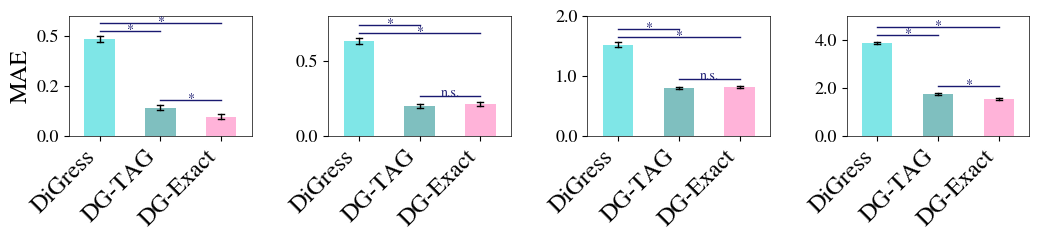

In [6]:
########################################################################
### Figure 1: Create panels-row for main text figure.
########################################################################
# General plot specs
include_tag       = True # Should we include TAG?
num_valid_samples = 1000 # Number of valid SMILES string samples to show

# Define suffix specific plot specs
if include_tag:
    suffix_label_map = {
                        'DiGress':   'DiGress',
                        'TAG':       'DG-TAG',
                        'exact':     'DG-Exact',
    }
else:
    suffix_label_map = {
                        'DiGress':   'DiGress',
                        'exact':     'DG',
    }

suffix_color_map       = {
                          'exact':   'hotpink',
                          'TAG':     'teal',
                          'DiGress': 'darkturquoise',
}

# Define plot specs
plot_specs = {
    'bar_alpha': 0.5,
    'bar_width': 0.5,
    'p_val_annotation_color': 'midnightblue',
    'title_fs': 16,
    'xticklabels_fs': 17.5,
    'yaxislabel_fs': 17.5,
    'yticklabels_fs': 13,
    'p_val_annotation_fs': 10,
    'panel_label_fs': 15,
    'panel_label_fw': 'bold',
    'p_val_annotation_style': 'single_level', # '*' if p-value<=0.05 otherwise 'n.s.'
}
y_max_dict = {
    'num_rings=1': 0.60001,
    'num_rings=5': 0.8,
    'logp=-2':     2.0,
    'logp=10':     5.0,
}

guide_temps              = [0.5]
property_name_value_list = [('num_rings', 1), ('num_rings', 5), ('logp', -2), ('logp', 10)]
panel_labels             = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r']

# Step 1: Preparation
suffix_list = [suffix for suffix in suffix_label_map]
plot_specs['suffix_label_map'] = suffix_label_map
plot_specs['suffix_list']      = suffix_list
plot_specs['suffix_color_map'] = suffix_color_map

num_rows = 1
num_cols = len(property_name_value_list)

figsize_scale = 3
figsize  = (4*figsize_scale, 0.5*figsize_scale)
fig, axs = plt.subplots(1, num_cols, figsize=figsize)
for row_index, guide_temp in enumerate(guide_temps):
    for col_index, property_name_value in enumerate(property_name_value_list):
        property_name   = property_name_value[0]
        property_value  = property_name_value[1]
        property_prefix = f"{property_name}={property_value}"

        # Get the axis
        ax = axs[col_index]

        # Get the panel label
        subplot_index = row_index + num_rows*col_index
        panel_label = panel_labels[subplot_index]

        if guide_temp==0.5:
            guide_temp_label = 'T=05'
            gamma_label = '2'
        elif guide_temp==1:
            guide_temp_label = 'T=1'
            gamma_label = '1'
        elif guide_temp==5:
            guide_temp_label = 'T=5'
            gamma_label = '0.2'
        elif guide_temp==10:
            guide_temp_label = 'T=10'
            gamma_label = '0.1'
        else:
            raise ValueError(f"No generation has been performed for guide temperature '{guide_temp}'")

        abs_error_distr_dict = dict()
        for suffix in suffix_list:
            key = f"{property_prefix}_{guide_temp_label}_{suffix}"
            try:
                property_distr = utils.get_property_distr(gen_df_dict[key], 'ground_truth', property_name=property_name, num_valid_samples=num_valid_samples, enfore_uniqueness=False)    
            except KeyError:
                abs_error_distr_dict[suffix] = None
                continue
            abs_error_distr = np.abs(property_value-property_distr)
            abs_error_distr_dict[suffix] = abs_error_distr

        # Make the plot
        if row_index==num_rows-1:
            show_xticklabels = True
        else:
            show_xticklabels = False
        if col_index==0:
            y_label = 'MAE'
            show_yticklabels = True
        else:
            y_label = None
            show_yticklabels = False
        show_yticklabels = True
        panel_label = None
        
        if property_name=='num_rings':
            title = r'$N_{r}^{\star}$' + f"={property_value}"
        else: # property_name=='logp'
            title = r'$\mathrm{LogP}^{\star}$' + f"={property_value}"

        y_max_scale = 1.3
        p_val_annotation_offset = 0
        y_max = y_max_dict[property_prefix]

        title = None
        plotting.make_mae_plot(abs_error_distr_dict, 
                               plot_specs, 
                               ax=ax, 
                               y_max=y_max, 
                               y_max_scale=y_max_scale, 
                               p_val_annotation_offset=p_val_annotation_offset, 
                               y_label=y_label, 
                               show_xticklabels=show_xticklabels, 
                               show_yticklabels=show_yticklabels,
                               title=title, 
                               panel_label=panel_label, 
                               display_info=False)
        
        # Change all spines (axis-linewidths)
        for spine in ['top','bottom','left','right']:
            ax.spines[spine].set_linewidth(0.5)

### Global specs
# Adjust subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.42, #0.3, 
                    hspace=0.4)

plt.show()

# Save the figure as pdf
if include_tag:
    file_path = str(Path(figures_dir_path, 'main_framework_comparison_selection.pdf'))
else:
    file_path = str(Path(figures_dir_path, 'main_framework_comparison_selection_TAG_EXCLUDED.pdf'))
fig.savefig(file_path, format='pdf', bbox_inches='tight')